In [9]:
#alpha-trimmed mean filtering(알파-절삭 평균값 필터링)
#가중치(알파)를 두어 일부를 자르고(절삭) 그 값들의 평균값을 취하는 방식
import cv2
import numpy as np
img = cv2.imread("d:/data/images/penguin.png")

In [10]:
height, width, channel = img.shape
# salt and pepper noise를 만드는 코드
# 이미지에 희고(salt - 소금) 검은(pepper - 후추) 노이즈
alpha=0.3
noise = img.copy()
salt = int(height * width * 0.1)
for i in range(salt):
    row = int(np.random.randint(99999, size=1) % height)
    col = int(np.random.randint(99999, size=1) % width)
    ch = int(np.random.randint(99999, size=1) % channel)
    noise[row][col][ch] = 255 if np.random.randint(99999, size=1) % 2 == 1 else 0

In [11]:
#노이즈 제거
out = np.zeros((height + 1, width + 1, channel), dtype=float) #제로 패딩
out[1:1 + height, 1:1 + width] = img.copy().astype(float)
temp = out.copy()
for i in range(height):
    for j in range(width):
        for k in range(channel):
            mean = np.sort(np.ravel(temp[i:i + 3, j:j + 3, k]))
            out[1 + i, 1 + j, k] = np.mean(mean[int(alpha * 9):-int(alpha * 9)])
out = out[1:1 + height, 1:1 + width].astype(np.uint8)

c:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


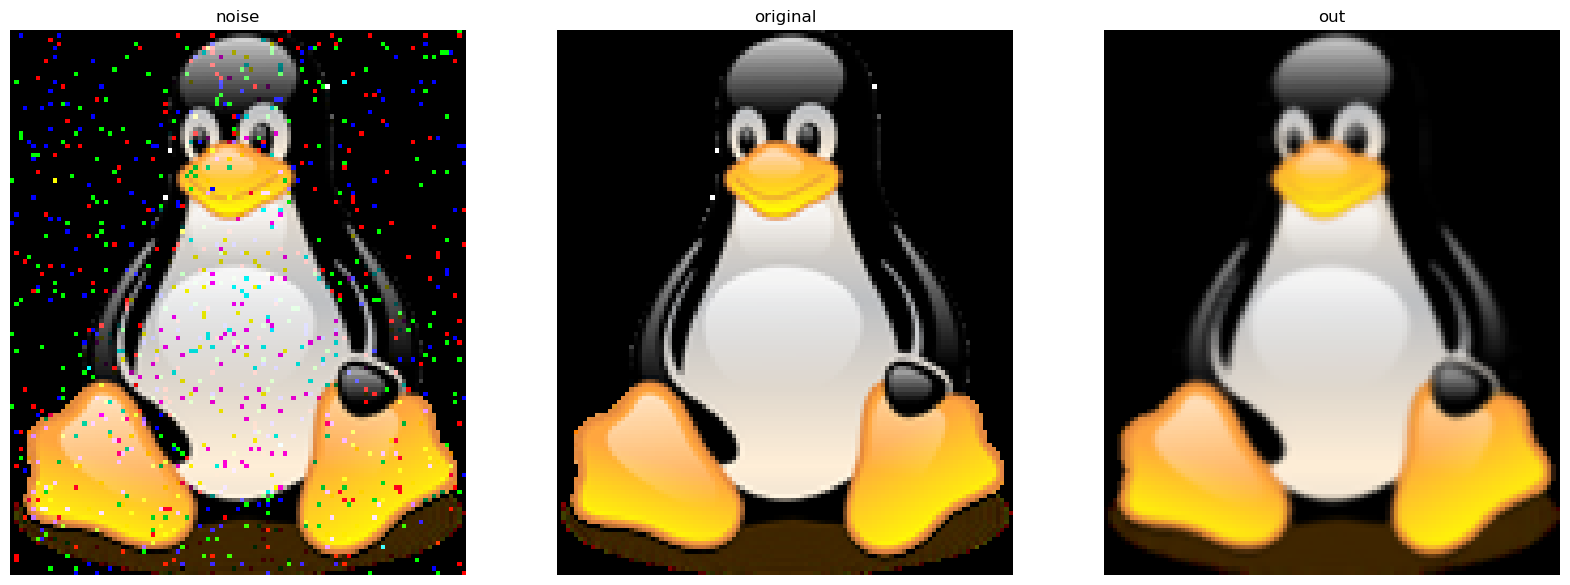

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
noise = cv2.cvtColor(noise, cv2.COLOR_BGR2RGB)
plt.imshow(noise)
plt.title('noise')
plt.axis("off")
plt.subplot(1, 3, 2)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('original')
plt.axis("off")
plt.subplot(1, 3, 3)
out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
plt.imshow(out)
plt.title('out')
plt.axis("off")
plt.show()